## Binomial Distribution


### What is Bionamial Distribution

Binomial distribution is a **probability distribution** that summarizes the likelihood that a variable will take **one of two independent values** under a given set of parameters. The distribution is obtained by performing a number of **Bernoulli trials**. A Bernoulli trial is assumed to meet each of these criteria:

- There must be **only 2** possible outcomes.
- Each outcome has a **fixed probability** of occurring. A success has the probability of \( p \), and a failure has the probability of \( 1 - p \).
- Each trial is **completely independent** of all others.

The **binomial random variable** represents the **number of successes \( r \)** in **\( n \) successive independent trials** of a Bernoulli experiment. The probability of achieving **\( r \) successes and \( n - r \) failures** is:

$$
p^{r} (1 - p)^{(n - r)}
$$

The number of ways we can achieve \( r \) successes is:

$$
\frac{n!}{(n-r)! \, r!}
$$

Hence, the probability mass function (pmf), which is the total probability of achieving \( r \) successes and \( n - r \) failures, is:

$$
\frac{n!}{(n-r)! \, r!} \cdot p^r \cdot (1-p)^{n-r}
$$

### Example 01:

The company's marketing team knows the probability of each successful campaign is 30%. If they run 5 advertising campaigns, what is the probability that at least 2 of the campaigns will be successful?

*Solution:*

There are two ways to calculate this probability:

- Calculate the probability of being successful **at least 2 times**. This involves finding the probability for all cases where 2, 3, 4, or 5 campaigns are successful. ( k = [2, 3, 4, 5] )
  $$
    \Sigma \frac{(n)!}{(k)!(n - k)!} \cdot (0.3)^{k} \cdot (1 - 0.3)^{n-k}
  $$

  *answer 01:*
  $$
      \frac{(5)!}{(2)!(3)!} \cdot (0.3)^{2} \cdot (0.7)^{3} + \frac{(5)!}{(3)!(2)!} \cdot (0.3)^{3} \cdot (0.7)^{2} + \frac{(5)!}{(4)!(1)!} \cdot (0.3)^{4} \cdot (0.7)^{1} + \frac{(5)!}{(5)!(0)!} \cdot (0.3)^{5} \cdot (0.7)^{0}  =  0.3087 + 0.1323 + 0.02835 + 0.00243 = 0.47178
  $$



  
- Calculate the probability of **none or only one campaign being successful**, and then subtract this from 1. ( k = [0, 1] )
  $$
   1 - \Sigma \frac{(n)!}{(k)!(n - k)!} \cdot (0.3)^{k} \cdot (1 - 0.3)^{n-k}
  $$
  *answer 02:*
  $$
    1 - [ \frac{(5)!}{(0)!(5)!} \cdot (0.3)^{0} \cdot (0.7)^{5} + \frac{(5)!}{(1)!(4)!} \cdot (0.3)^{1} \cdot (0.7)^{4} ] = 1 - 0.16807 + 0.36015 = 1 - 0.52822 = 0.47178
  $$


In [1]:
from scipy.stats import binom 
# setting the values 
# of n and p 
n = 5
p = 0.3
k = 2
# defining the list of r values 
r_values = list(range(n + 1)) 
# obtaining the mean and variance 
mean, var = binom.stats(n, p) 
# list of pmf values 
dist = [binom.pmf(r, n, p) for r in r_values ] 
# printing the table 
# solution01:
print("r\tp(r)") 
for i in range(k, n + 1): 
	print(str(r_values[i]) + "\t" + str(dist[i])) 

print(f"probability of being successful at least 2 times over 5 trials is: {sum(dist[k:])}\n")

# solution02:
print("r\tp(r)") 
for i in range(k): 
	print(str(r_values[i]) + "\t" + str(dist[i])) 

print(f"probability of being successful at least 2 times over 5 trials is: 1 - {sum(dist[:k])} = {1 - sum(dist[:k])}")



r	p(r)
2	0.30869999999999975
3	0.1322999999999999
4	0.028349999999999986
5	0.0024299999999999994
probability of being successful at least 2 times over 5 trials is: 0.4717799999999996

r	p(r)
0	0.16806999999999994
1	0.3601499999999999
probability of being successful at least 2 times over 5 trials is: 1 - 0.5282199999999999 = 0.4717800000000001


### Let's see how the probability of wining EXACTLY K times over N trials are different in this case:

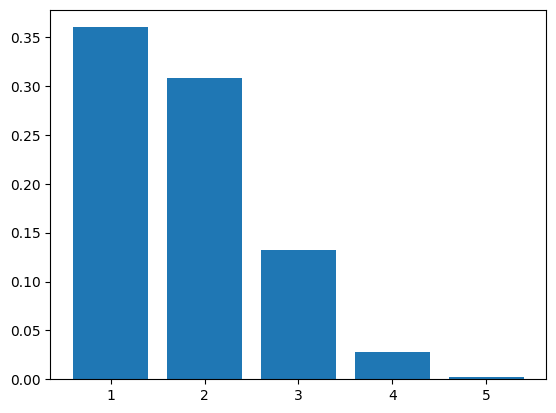

In [2]:
from scipy.stats import binom 
import matplotlib.pyplot as plt 
# setting the values 
# of n and p 
n = 5
p = 0.3
# defining list of r values 
r_values = list(range(1, n + 1)) 
# list of pmf values 
dist = [binom.pmf(r, n, p) for r in r_values ] 
# plotting the graph 
plt.bar(r_values, dist) 
plt.show()


#### Looks like its more likely to be successfull 1 time over 5 trials!!

### Example 02:

Professor Banach carries a matchbox in each of his two pockets. Each time he wants to use a match, he randomly chooses one of the two matchboxes. If each matchbox initially contains 𝑁 matches, what is the probability that exactly 
𝐾 matches remain in the other matchbox?

*Solution:*

We expect the professor to take 
𝑁 matches from one matchbox and 𝑁 − 𝐾 matches from the other, for a total of 2𝑁 − 𝐾 matches. We want to calculate the probability that he picks exactly 𝑁 − 𝐾 matches from one matchbox and the remaining 𝑁 matches from the other.
To do so...

$$
\frac{(2n - k)!}{(n - k)!(n)!} \cdot (0.5)^{n - k} \cdot (1-0.5)^{n}
$$

#### Let's see it with numbers.
- N: 10
- K: 4
- p: 0.5

r	p(r)
1	0.00024414062500000027
2	0.0018310546875000017
3	0.008544921875000009
4	0.027770996093749993
5	0.06665039062499997
6	0.12219238281249994
7	0.17456054687499994
8	0.1963806152343748
9	0.17456054687499994
10	0.12219238281249994
11	0.06665039062499999
12	0.02777099609375
13	0.008544921875000007
14	0.001831054687500002
15	0.00024414062500000027
16	1.52587890625e-05



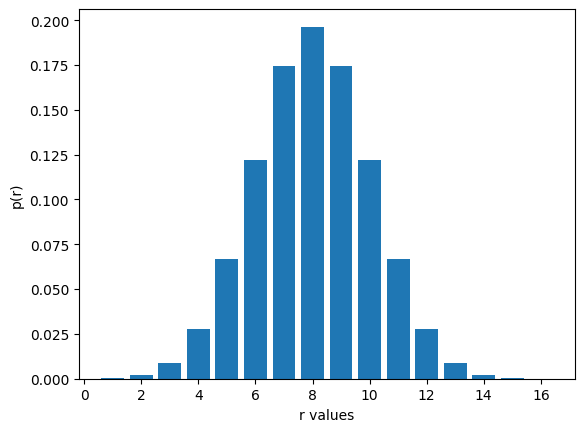

In [5]:
# setting the values 
# of n and p 
n = 10
p = 0.5
k = 4

# defining the list of r values 
r_values = list(range(1, 2*n - k + 1)) 
# obtaining the mean and variance 
mean, var = binom.stats(n, p) 
# list of pmf values 
dist = [binom.pmf(r, (2*n - k), p) for r in r_values ] 
# printing the table 
# solution01:
print("r\tp(r)") 
for i in range(2*n - k): 
	print(str(r_values[i]) + "\t" + str(dist[i])) 
print('\n')
plt.bar(r_values, dist) 
plt.xlabel("r values")
plt.ylabel("p(r)")
plt.show()

